In [1]:
from sklearn.datasets import fetch_mldata
from q1 import HopfieldNetwork
import numpy as np
import random
import matplotlib.pyplot as plt

mnist = fetch_mldata('MNIST original', data_home='.cache')
targets = mnist.target.tolist()

ones = mnist.data[targets.index(1):targets.index(2)]
ones = [[1 if p > 0 else -1 for p in v] for v in ones]
ones = [(x, 1) for x in ones]

fives = mnist.data[targets.index(5):targets.index(6)]
fives = [[1 if p > 0 else -1 for p in v] for v in fives]
fives = [(x, 5) for x in fives]

dataset = ones + fives

random.shuffle(dataset)

In [19]:
hf_storkey = HopfieldNetwork(
    train_dataset=dataset[:2000],
    mode='storkey'
)

In [15]:
hf_hebbian = HopfieldNetwork(
    train_dataset=dataset[:20],
    mode='hebbian'
)

In [21]:
def add_noise(vector, ratio=0.2):
    indices = range(len(vector))
    num = ratio * len(indices)
    for i in range(int(num)):
        c = random.choice(indices)
        vector[c] = 1 if vector[c] == -1 else -1
        
def show(vector, title='', suptitle=''):
    plt.imshow(np.array(vector).reshape(28, 28))
    plt.title(title)
    plt.suptitle(suptitle)
    plt.show()


def test(network, index, image, sup):
    print 'Example %s' % index
    v = network.activate(image)
    show(image, "Input - Example %s" % index, sup)
    show(v, "Output - Example %s" % index, sup)


Example 0


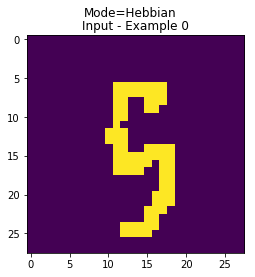

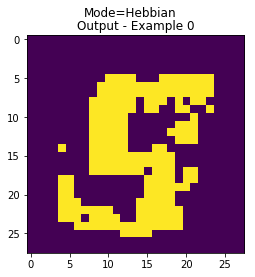

Example 1


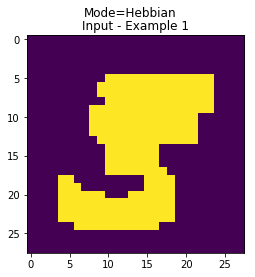

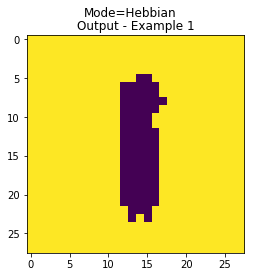

Example 2


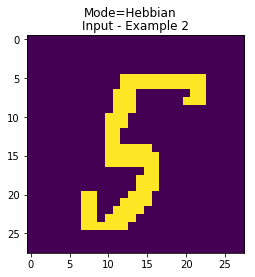

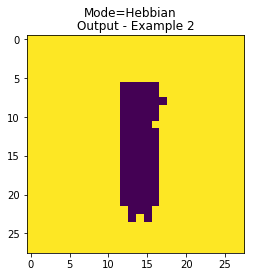

Example 3


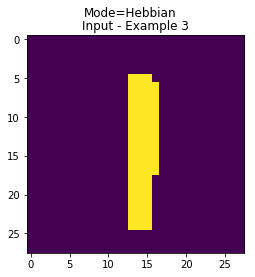

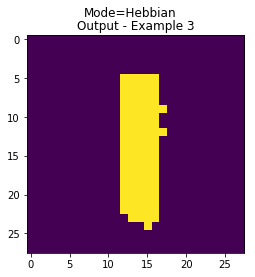

Example 4


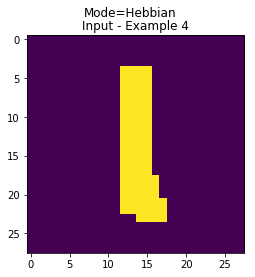

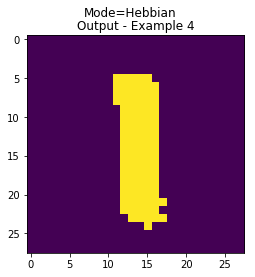

Example 5


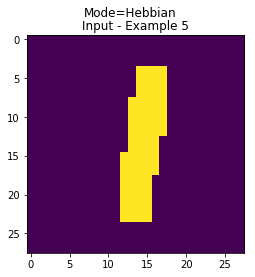

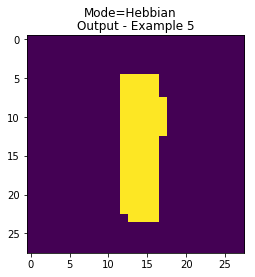

Example 6


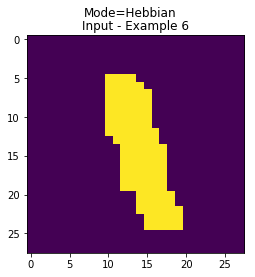

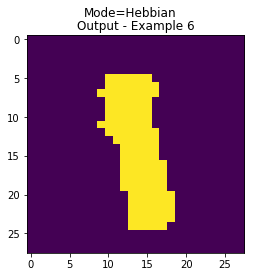

Example 7


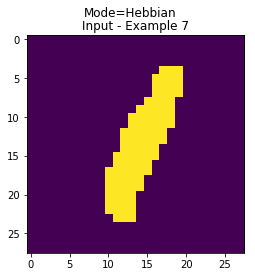

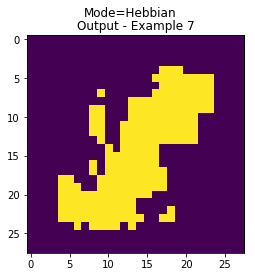

Example 8


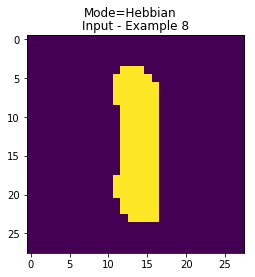

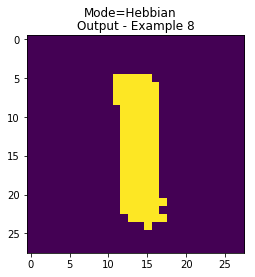

Example 9


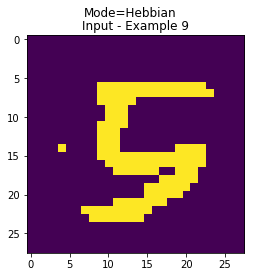

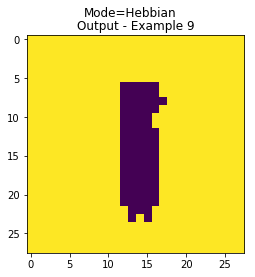

Example 10


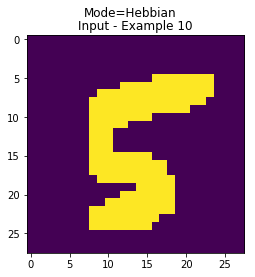

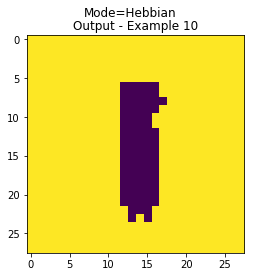

Example 11


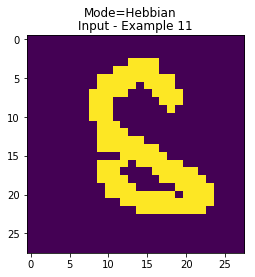

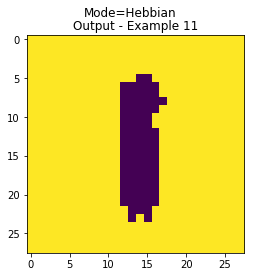

Example 12


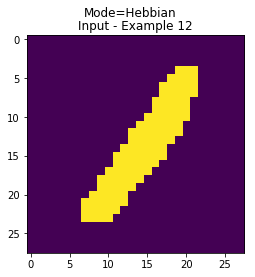

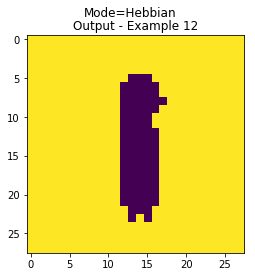

Example 13


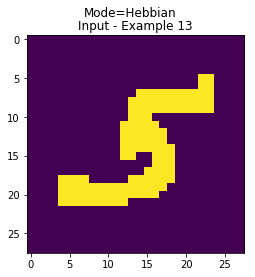

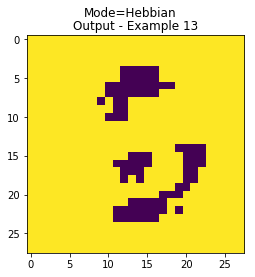

Example 14


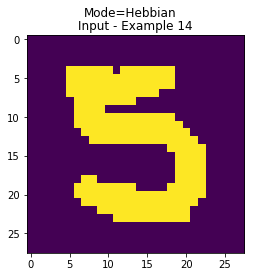

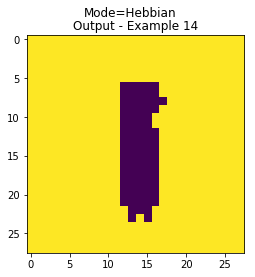

Example 15


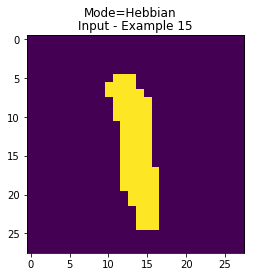

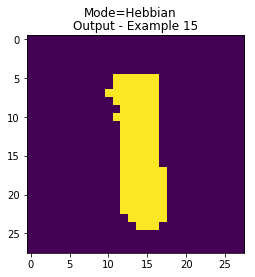

Example 16


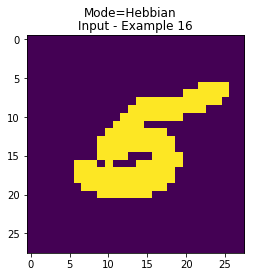

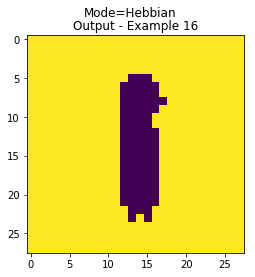

Example 17


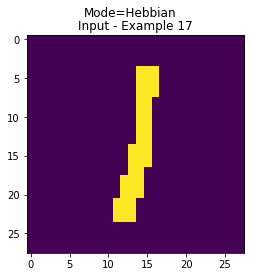

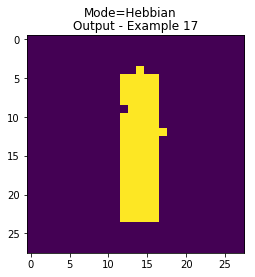

Example 18


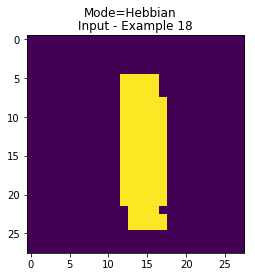

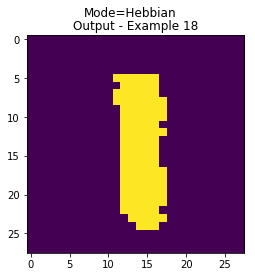

Example 19


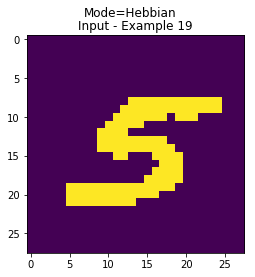

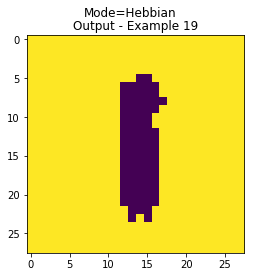

In [22]:
for index, image in enumerate(dataset[:20]):
    test(hf_hebbian, index, image[0], "Mode=Hebbian")

Example 0


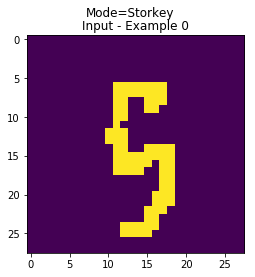

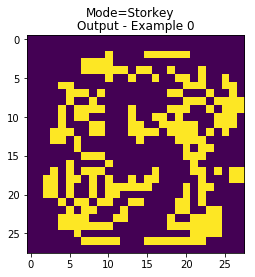

Example 1


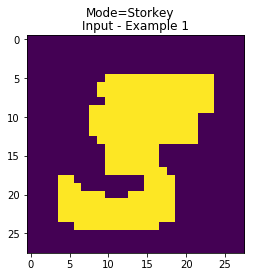

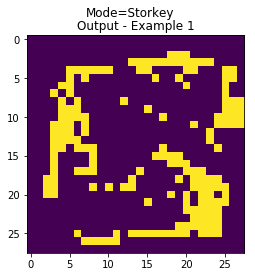

Example 2


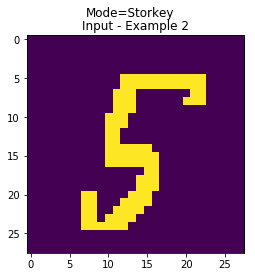

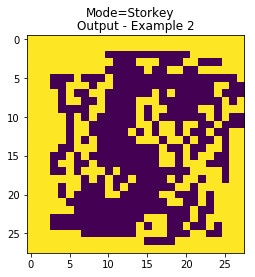

Example 3


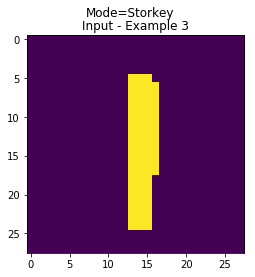

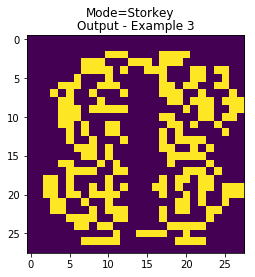

Example 4


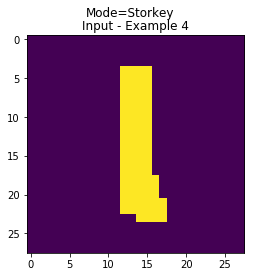

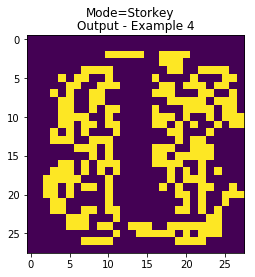

Example 5


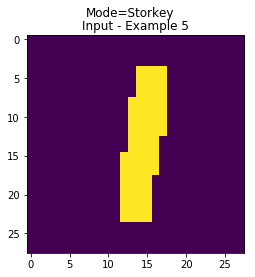

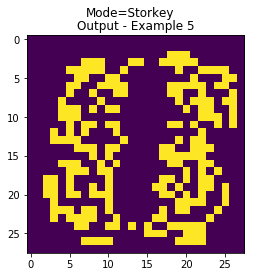

Example 6


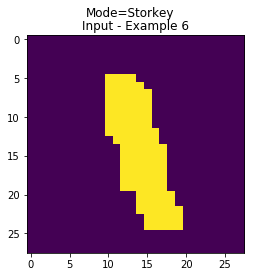

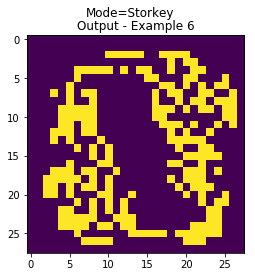

Example 7


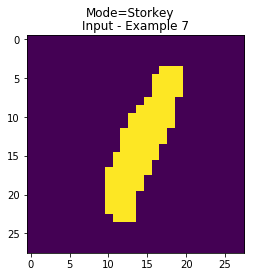

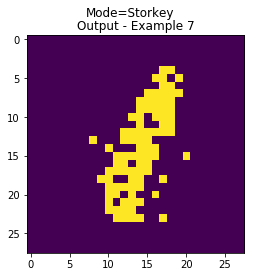

Example 8


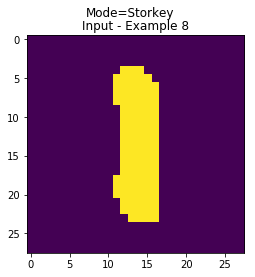

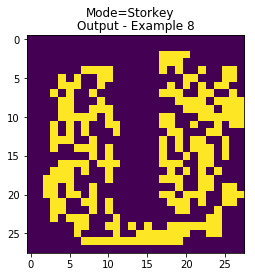

Example 9


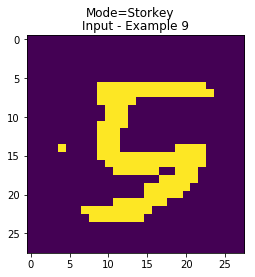

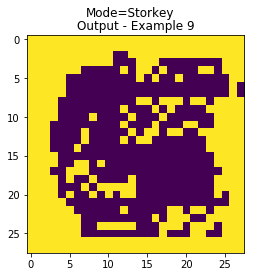

Example 10


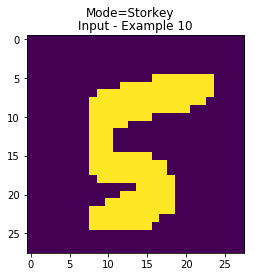

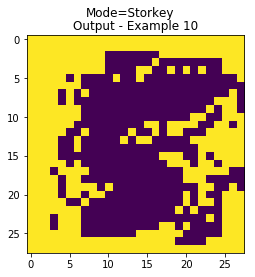

Example 11


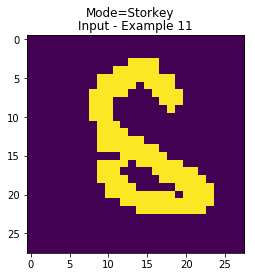

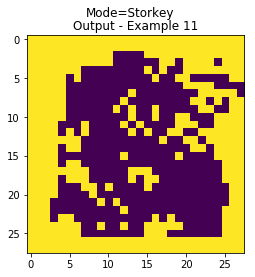

Example 12


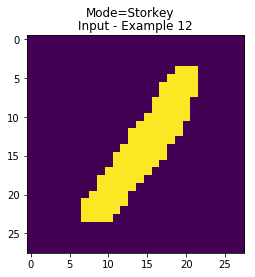

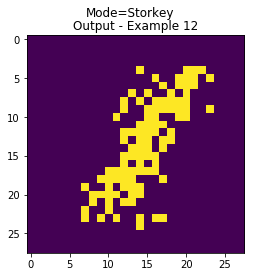

Example 13


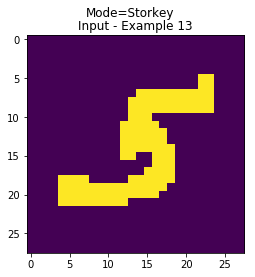

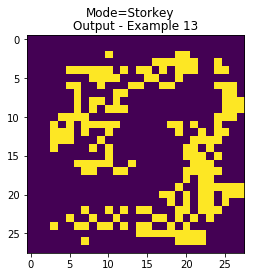

Example 14


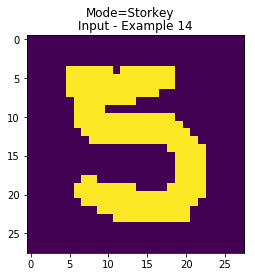

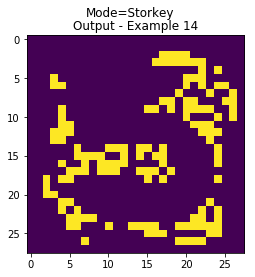

Example 15


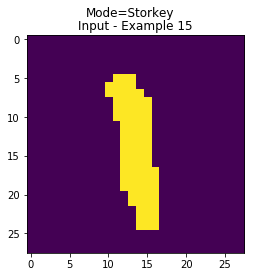

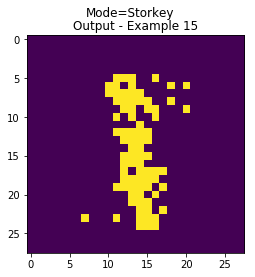

Example 16


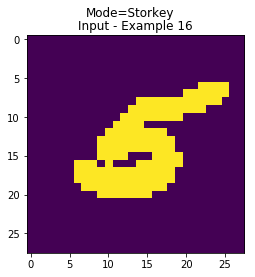

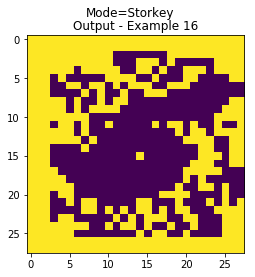

Example 17


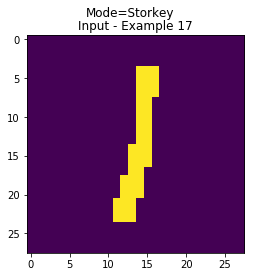

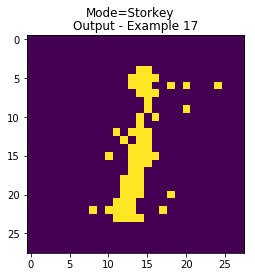

Example 18


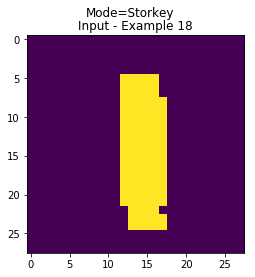

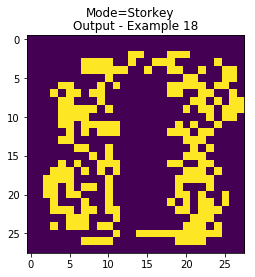

Example 19


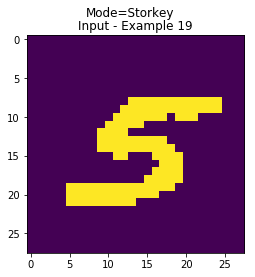

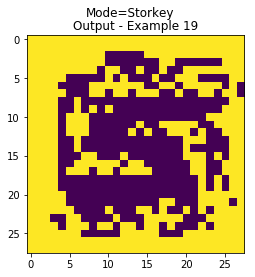

In [23]:
for index, image in enumerate(dataset[:20]):
    test(hf_storkey, index, image[0], "Mode=Storkey")